In [1]:
import pandas as pd
import os
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
import time

warnings.filterwarnings("ignore")

os.chdir(r"C:\Users\ezkiska\Videos\Imarticus\Python\6th Week 11th & 12th Jan\SAT 11th Jan Kmeans clustering")

data = pd.read_csv('snsdata.csv')
data.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [2]:
data.describe()

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,24914.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,2007.500000,17.993950,30.179467,0.267333,0.252300,0.222767,0.161200,0.143133,0.13440,0.106633,...,0.098933,0.257367,0.353000,0.14850,0.069867,0.051167,0.184100,0.114233,0.087967,0.060433
std,1.118053,7.858054,36.530877,0.804708,0.705357,0.917226,0.739707,0.639943,0.51699,0.514333,...,1.942319,0.695758,0.724391,0.47264,0.346779,0.279555,0.624516,0.436796,0.399125,0.345522
min,2006.000000,3.086000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.750000,16.312000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.500000,17.287000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.250000,18.259000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,106.927000,830.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.00000,9.000000,...,327.000000,12.000000,11.000000,8.00000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [3]:
data.describe(include = 'O')

,gender
count,27276
unique,2
top,F
freq,22054


In [4]:
data.dtypes

gradyear          int64
gender           object
age             float64
friends           int64
basketball        int64
football          int64
soccer            int64
softball          int64
volleyball        int64
swimming          int64
cheerleading      int64
baseball          int64
tennis            int64
sports            int64
cute              int64
sex               int64
sexy              int64
hot               int64
kissed            int64
dance             int64
band              int64
marching          int64
music             int64
rock              int64
god               int64
church            int64
jesus             int64
bible             int64
hair              int64
dress             int64
blonde            int64
mall              int64
shopping          int64
clothes           int64
hollister         int64
abercrombie       int64
die               int64
death             int64
drunk             int64
drugs             int64
dtype: object

In [5]:
data.isnull().sum()

gradyear           0
gender          2724
age             5086
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

In [6]:
'''gender and age has missing values'''

# gender is categorical
data.gender.value_counts()

F    22054
M     5222
Name: gender, dtype: int64

In [7]:
data.gender.value_counts(dropna = False)
data.gender.value_counts(dropna = False)/data.shape[0] # will return proportion

F      0.735133
M      0.174067
NaN    0.090800
Name: gender, dtype: float64

In [9]:
'''
# Here, we see that 2,724 records (9 percent) have missing gender data. Interestingly, there are over
# four times as many females as males in the SNS data, suggesting that males are not as inclined to 
# use SNS websites as females.
'''
# age is continuous
data.age.describe()

count    24914.000000
mean        17.993950
std          7.858054
min          3.086000
25%         16.312000
50%         17.287000
75%         18.259000
max        106.927000
Name: age, dtype: float64

In [11]:
data.age.isnull().sum()

5086

In [12]:
data.age.isnull().sum()/data.shape[0] #percentage calculatio approx 17 percent.

0.16953333333333334

106.927

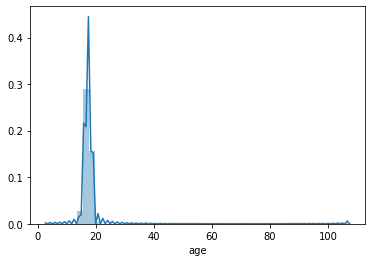

In [13]:
sns.distplot(data.age.fillna(data.age.median()))
data.age.max() #106.927

In [14]:
data.age.min() #3.0860000000000003

3.0860000000000003

In [16]:
data.loc[(data.age < 13), 'age'] = np.nan

In [17]:
data.loc[(data.age >= 20), 'age'] = np.nan

In [18]:
'''
# By rechecking the summary() output, we see that the age range now follows a distribution that 
# looks much more like an actual high school:
'''

data.age.isnull().sum()

5523

In [19]:
data.age.describe()

count    24477.000000
mean        17.252429
std          1.157465
min         13.027000
25%         16.304000
50%         17.265000
75%         18.220000
max         19.995000
Name: age, dtype: float64

In [20]:
data.age.isnull().sum()/data.shape[0]

0.1841

In [21]:
'''
# Unfortunately, now we’ve created an even larger missing data problem. We’ll need to find a way to deal with these values before continuing with our analysis.

# Data preparation - dummy coding missing values
'''
data['gender'] = data.gender.fillna('Unknown')
data.gender.value_counts()

F          22054
M           5222
Unknown     2724
Name: gender, dtype: int64

In [22]:
df_gender = pd.get_dummies(data.gender, drop_first = 'True') #Convert categorical variable into dummy/indicator variables.
'''#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html'''

''' Data preparation - imputing the missing values
'''

' Data preparation - imputing the missing values\n'

In [23]:
np.mean(data.age)

17.25242893328433

In [24]:
data[['age', 'gradyear']].groupby(['gradyear'], as_index=False).mean().sort_values(by='gradyear', ascending=True)

data.loc[(data.age.isnull()) & (data.gradyear == 2006), 'age'] = 18.656
data.loc[(data.age.isnull()) & (data.gradyear == 2007), 'age'] = 17.706
data.loc[(data.age.isnull()) & (data.gradyear == 2008), 'age'] = 16.768
data.loc[(data.age.isnull()) & (data.gradyear == 2009), 'age'] = 15.819

In [25]:
data.age.isnull().any()

False

In [26]:
data1 = data.drop(['gender'], axis = 1)
df = pd.concat([data1, df_gender], axis = 1)

In [27]:
data = df.copy()

In [28]:
from sklearn import preprocessing

## scaling
scaler = preprocessing.StandardScaler().fit(df[['age', 'friends']])
dfs = scaler.transform(df[['age', 'friends']])

df[['age', 'friends']] = dfs

df = df.drop(['gradyear', 'M', 'Unknown'], axis = 1)

data = df.copy()

In [29]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(df)
data['cluster'] = kmeans.labels_ #model.predict(df)
data['cluster'].value_counts()

index_remove = data['cluster'][data['cluster'] == 2].index[0]
df =  df.drop(df.index[[index_remove]])
data = data.drop(data.index[[index_remove]])

kmeans = KMeans(n_clusters=3, random_state=0).fit(df)
data['cluster'] = kmeans.labels_ #model.predict(df)
data['cluster'].value_counts()
centers = kmeans.cluster_centers_
cluster_assignments = kmeans.labels_
X = df.values
np.sum((X - centers[cluster_assignments]) ** 2)

sil = []

Silhouette Score for 2 Clusters: 0.9833
Silhouette Score for 3 Clusters: 0.3871
Silhouette Score for 4 Clusters: 0.3723
Silhouette Score for 5 Clusters: 0.0596
Silhouette Score for 6 Clusters: 0.0653
Silhouette Score for 7 Clusters: 0.0695
Silhouette Score for 8 Clusters: 0.0514
Silhouette Score for 9 Clusters: 0.0536
Silhouette Score for 10 Clusters: 0.0594


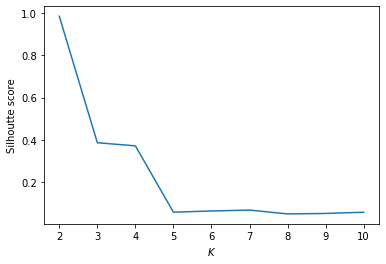

In [30]:
# Use silhouette coefficient to determine the best number of clusters
from sklearn.metrics import silhouette_score

for n_cluster in  list(range(2,11)): #[4,5,6,7,8]:
    kmeans = KMeans(n_clusters=n_cluster).fit(df)
    
    silhouette_avg = silhouette_score(df, kmeans.labels_)
    
    print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))
    
    sil.append(silhouette_avg)


krange = list(range(2,11))
plt.plot(krange, sil)
plt.xlabel("$K$")
plt.ylabel("Silhoutte score")
plt.show()

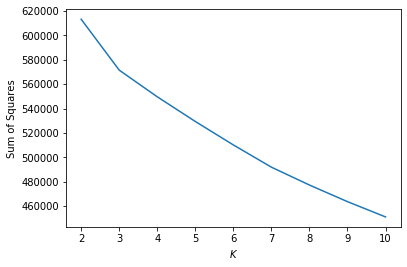

In [31]:
from sklearn import cluster
import numpy as np

sse = []
krange = list(range(2,11))
X = df.values
for n in krange:
    model = cluster.KMeans(n_clusters=n, random_state=3)
    model.fit_predict(X)
    cluster_assignments = model.labels_
    centers = model.cluster_centers_
    sse.append(np.sum((X - centers[cluster_assignments]) ** 2))

plt.plot(krange, sse)
plt.xlabel("$K$")
plt.ylabel("Sum of Squares")
plt.show()


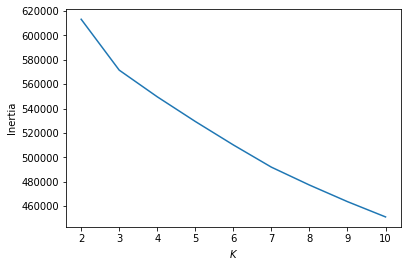

In [32]:
# 3 optimal clusters


# using inertia
inertia = []
krange = list(range(2,11))
X = df.values
for n in krange:
    model = cluster.KMeans(n_clusters=n, random_state=3)
    model.fit_predict(X)
    labels = model.labels_
    inertia_ = model.inertia_
    inertia.append(inertia_)
      

plt.plot(krange, inertia)
plt.xlabel("$K$")
plt.ylabel("Inertia")
plt.show()

In [33]:
# check groups

kmeans = KMeans(n_clusters=3, max_iter = 1000).fit(df)

data['cluster'] = kmeans.labels_ #model.predict(df)
data['cluster'].value_counts()


1    25750
0     4248
2        1
Name: cluster, dtype: int64